In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
# File to Load 
file = "methane_hist_emissions.csv"
methane_emissions = pd.read_csv(file, index_col=0)

In [3]:
methane_emissions.head()

,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,827.98,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,824.27,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,677.00,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [144]:
# Transpose indices and column headers in methane emission dataframe
df_transposed = methane_emissions.copy(deep=True)
df_transposed = df_transposed.drop(['Gas','Unit'], axis=1).groupby([df_transposed.index,'Sector']).mean().transpose()
df_transposed.head()

Country Afghanistan                                                 \
Sector  Agriculture Energy Fugitive Emissions Industrial Processes   
2018          10.45  67.91               2.22                  0.0   
2017          10.33  66.21               2.21                  0.0   
2016          10.63  64.51               2.19                  0.0   
2015          10.85  62.82               2.18                  0.0   
2014          11.48  53.45               1.98                  0.0   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                             0.0                 65.69   
2017                             0.0                 64.00   
2016                             0.0                 62.32   
2015                             0.0                 60.64   
2014                             0.0                 51.47   

Country                                                     Albania  ...  \
Sector  Total excluding LUCF Total including LUCF Waste Agriculture  ...   
2018                   81.51                81.51  3.15        2.01  ...   
2017                   79.61                79.61  3.08        2.05  ...   
2016                   78.15                78.15  3.00        2.10  ...   
2015                   76.59                76.59  2.93        2.11  ...   
2014                   67.77                67.77  2.84        2.10  ...   

Country Zambia    Zimbabwe                                                 \
Sector   Waste Agriculture Energy Fugitive Emissions Industrial Processes   
2018      3.42        6.43   2.52               0.71                 0.48   
2017      3.32        6.23   2.48               0.70                 0.48   
2016      3.21        6.14   2.44               0.68                 0.48   
2015      3.10        6.64   2.40               0.66                 0.48   
2014      3.01        5.89   2.22               0.60                 0.48   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                            0.11                  1.81   
2017                            0.06                  1.78   
2016                            0.11                  1.76   
2015                            0.14                  1.74   
2014                            0.08                  1.61   

Country                                                  
Sector  Total excluding LUCF Total including LUCF Waste  
2018                   11.85                11.96  2.42  
2017                   11.56                11.62  2.37  
2016                   11.38                11.50  2.32  
2015                   11.79                11.93  2.27  
2014                   10.82                10.90  2.23  

[5 rows x 1738 columns]

In [139]:
# Plot
#df_transposed.plot(kind='line', legend=False, figsize=(20,20))


pandas.core.frame.DataFrame

In [5]:
# Drop unused columns
methane_emissions_df = methane_emissions.drop(columns=["Gas", "Unit"], axis =1)
methane_emissions_df.head()

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [290]:
# Create a list of countries from methane_emission_df 
countries = []
for country in methane_emissions_df.index.unique():
    countries.append(country)
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 

In [287]:
len(countries)

195

In [6]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Oxana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
# GDP data to Load 
file = "World GDP Data.xls"
GDP = pd.read_excel(file, index_col=0)
GDP.head()

,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,1996,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [8]:
# Drop unused GDP columns
GDP_df = GDP.drop(columns = ["Country Code", "Indicator Name", "Indicator Code", "2019", "2020"])
GDP_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,7.648871e+08,8.721387e+08,9.584632e+08,1.082980e+09,1.245688e+09,1.320475e+09,1.379961e+09,1.531944e+09,1.665101e+09,1.722799e+09,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09
Africa Eastern and Southern,2.123361e+11,2.207637e+11,2.202188e+11,2.340352e+11,2.390883e+11,2.696893e+11,2.684404e+11,2.822135e+11,2.658377e+11,2.621972e+11,...,7.125580e+11,8.474095e+11,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Africa Western and Central,1.218022e+11,1.174570e+11,1.182823e+11,9.882641e+10,8.628177e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375202e+11,...,5.069964e+11,5.915830e+11,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11
Angola,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.015895e+09,5.344014e+09,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09
"Yemen, Rep.",5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,7.641103e+09,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,1.515166e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [284]:
# Drop rows with countries that don't have emission data
GDP_df_clean = GDP_df[GDP_df.index.isin(countries)]
GDP_df_clean

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,1.123628e+10,NaN,NaN,NaN,3.390500e+09,5.561222e+09,7.526964e+09,7.649716e+09,6.506619e+09,6.152937e+09,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,2.028554e+09,1.099559e+09,6.521750e+08,1.185315e+09,1.880952e+09,2.392765e+09,3.199641e+09,2.258514e+09,2.545965e+09,3.212122e+09,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,1.029048e+09,1.106929e+09,1.210014e+09,1.007026e+09,1.017549e+09,1.178739e+09,1.223945e+09,1.180597e+09,1.211932e+09,1.239876e+09,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,5.070144e+10,5.155217e+10,5.423917e+10,5.562517e+10,5.930509e+10,6.574367e+10,7.357123e+10,7.883901e+10,7.567434e+10,8.444547e+10,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,2.269924e+13,2.368028e+13,2.538286e+13,2.582013e+13,2.787426e+13,3.104337e+13,3.173630e+13,3.161983e+13,3.153976e+13,3.273425e+13,...,6.073036e+13,6.648828e+13,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13
Samoa,1.257663e+08,1.255972e+08,1.323030e+08,1.331229e+08,2.210981e+08,2.248657e+08,2.499090e+08,2.854756e+08,2.694815e+08,2.588338e+08,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
South Africa,1.155523e+11,1.239434e+11,1.345452e+11,1.471966e+11,1.535126e+11,1.717352e+11,1.632368e+11,1.689767e+11,1.529825e+11,1.515166e+11,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [292]:
# see what countries have probably different spelling
GDP_rest = GDP_df[~GDP_df.index.isin(countries)]
sorted(GDP_rest.index.unique())

['Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Arab World',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Polynesia',
 'Gambia, The',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong SAR, China',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Iran, Islamic Rep.',
 '

In [142]:
# Transpose indices and column headers in GDP dataframe
gdp_transposed = GDP_df.copy(deep=True)
gdp_transposed = gdp_transposed.transpose()
gdp_transposed = gdp_transposed.rename(columns={col:(col, 'GDP') for col in gdp_transposed.columns})
gdp_transposed.head()

Country Name,"(Aruba, GDP)","(Africa Eastern and Southern, GDP)","(Afghanistan, GDP)","(Africa Western and Central, GDP)","(Angola, GDP)","(Albania, GDP)","(Andorra, GDP)","(Arab World, GDP)","(United Arab Emirates, GDP)","(Argentina, GDP)",...,"(Virgin Islands (U.S.), GDP)","(Vietnam, GDP)","(Vanuatu, GDP)","(World, GDP)","(Samoa, GDP)","(Kosovo, GDP)","(Yemen, Rep., GDP)","(South Africa, GDP)","(Zambia, GDP)","(Zimbabwe, GDP)"
1990,7.648871e+08,2.123361e+11,NaN,1.218022e+11,1.123628e+10,2.028554e+09,1.029048e+09,6.226947e+11,5.070144e+10,1.413524e+11,...,NaN,6.471741e+09,1.688792e+08,2.269924e+13,1.257663e+08,NaN,5.647119e+09,1.155523e+11,3.285217e+09,8.783817e+09
1991,8.721387e+08,2.207637e+11,NaN,1.174570e+11,NaN,1.099559e+09,1.106929e+09,4.387866e+11,5.155217e+10,1.897200e+11,...,NaN,9.613370e+09,2.013342e+08,2.368028e+13,1.255972e+08,NaN,5.930370e+09,1.239434e+11,3.378882e+09,8.641482e+09
1992,9.584632e+08,2.202188e+11,NaN,1.182823e+11,NaN,6.521750e+08,1.210014e+09,4.738248e+11,5.423917e+10,2.287886e+11,...,NaN,9.866990e+09,2.090888e+08,2.538286e+13,1.323030e+08,NaN,6.463650e+09,1.345452e+11,3.181922e+09,6.751472e+09
1993,1.082980e+09,2.340352e+11,NaN,9.882641e+10,NaN,1.185315e+09,1.007026e+09,4.827783e+11,5.562517e+10,2.367417e+11,...,NaN,1.318095e+10,2.004919e+08,2.582013e+13,1.331229e+08,NaN,5.368271e+09,1.471966e+11,3.273238e+09,6.563813e+09
1994,1.245688e+09,2.390883e+11,NaN,8.628177e+10,3.390500e+09,1.880952e+09,1.017549e+09,5.077805e+11,5.930509e+10,2.574400e+11,...,NaN,1.628643e+10,2.337013e+08,2.787426e+13,2.210981e+08,NaN,4.167356e+09,1.535126e+11,3.656648e+09,6.890675e+09


In [239]:
merged = df_transposed.merge(gdp_transposed,how="left", right_index=True, left_index=True, validate="one_to_one")
cols = pd.MultiIndex.from_tuples([(x,y) for x,y in merged.columns])

merged = merged.transpose().reindex(cols)
merged.transpose().head()
#merged = merged.dropna(axis=0, how='any')


C:\Users\Oxana\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


Afghanistan                                                 \
     Agriculture Energy Fugitive Emissions Industrial Processes   
2018       10.45  67.91               2.22                  0.0   
2017       10.33  66.21               2.21                  0.0   
2016       10.63  64.51               2.19                  0.0   
2015       10.85  62.82               2.18                  0.0   
2014       11.48  53.45               1.98                  0.0   

                                                                              \
     Land-Use Change and Forestry Other Fuel Combustion Total excluding LUCF   
2018                          0.0                 65.69                81.51   
2017                          0.0                 64.00                79.61   
2016                          0.0                 62.32                78.15   
2015                          0.0                 60.64                76.59   
2014                          0.0                 51.47                67.77   

                                    Albania  ... Virgin Islands (U.S.)  \
     Total including LUCF Waste Agriculture  ...                   GDP   
2018                81.51  3.15        2.01  ...          3.900000e+09   
2017                79.61  3.08        2.05  ...          3.794000e+09   
2016                78.15  3.00        2.10  ...          3.798000e+09   
2015                76.59  2.93        2.11  ...          3.663000e+09   
2014                67.77  2.84        2.10  ...          3.565000e+09   

           Vietnam       Vanuatu         World         Samoa        Kosovo  \
               GDP           GDP           GDP           GDP           GDP   
2018  2.452137e+11  9.147279e+08  8.626760e+13  8.212869e+08  7.878509e+09   
2017  2.237799e+11  8.800436e+08  8.119329e+13  8.320256e+08  7.180813e+09   
2016  2.052762e+11  7.808896e+08  7.630506e+13  7.994939e+08  6.682833e+09   
2015  1.932411e+11  7.308706e+08  7.511244e+13  7.879586e+08  6.295820e+09   
2014  1.862047e+11  7.723157e+08  7.955766e+13  7.568059e+08  7.074658e+09   

       Yemen, Rep.  South Africa        Zambia      Zimbabwe  
               GDP           GDP           GDP           GDP  
2018  2.160614e+10  4.048421e+11  2.631159e+10  1.811554e+10  
2017  2.684013e+10  3.814488e+11  2.587360e+10  1.758489e+10  
2016  3.131737e+10  3.235855e+11  2.095841e+10  2.054868e+10  
2015  4.244510e+10  3.467098e+11  2.125122e+10  1.996312e+10  
2014  4.322859e+10  3.811989e+11  2.714102e+10  1.949552e+10  

[5 rows x 2004 columns]

<AxesSubplot:>

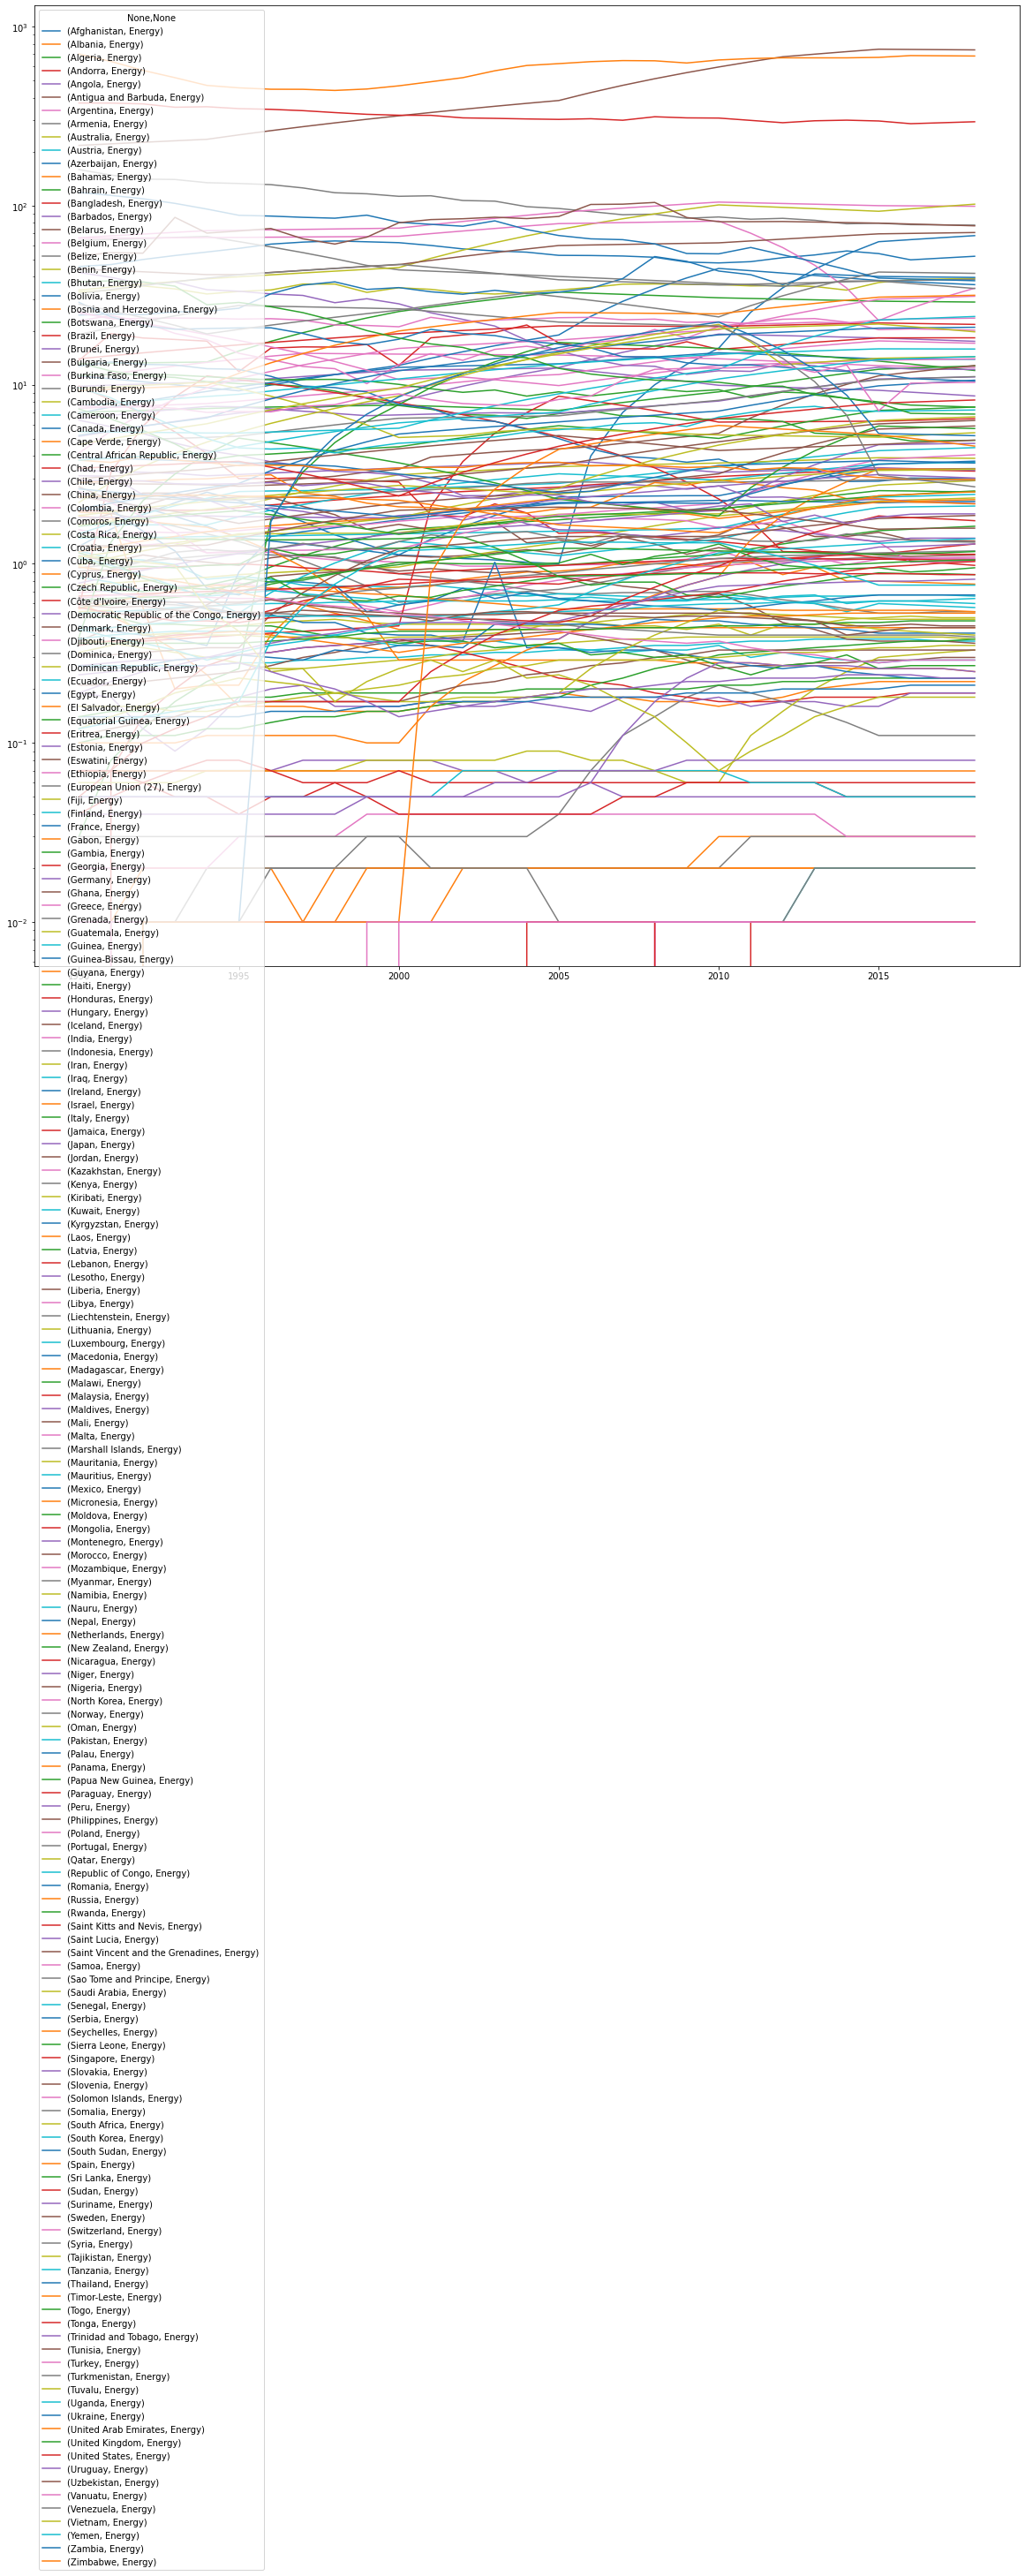

In [244]:
merged.xs('Energy', level=1, drop_level=False).iloc[:,::-1].transpose().plot(kind="line", figsize=(20,20), legend=True, logy=True)

In [265]:
merged.transpose().corr()[merged.transpose().corr()>0.95].dropna(how='all').dropna(how='all', axis=1)

Afghanistan                               \
                                   Agriculture    Energy Fugitive Emissions   
Afghanistan  Agriculture                   1.0       NaN                NaN   
             Energy                        NaN  1.000000           0.975737   
             Fugitive Emissions            NaN  0.975737           1.000000   
             Other Fuel Combustion         NaN  0.999970           0.973998   
             Total excluding LUCF          NaN  0.997743           0.982448   
...                                        ...       ...                ...   
Kosovo       GDP                           NaN       NaN                NaN   
Yemen, Rep.  GDP                           NaN       NaN                NaN   
South Africa GDP                           NaN       NaN                NaN   
Zambia       GDP                           NaN       NaN                NaN   
Zimbabwe     GDP                           NaN       NaN                NaN   

                                                                               \
                                   Other Fuel Combustion Total excluding LUCF   
Afghanistan  Agriculture                             NaN                  NaN   
             Energy                             0.999970             0.997743   
             Fugitive Emissions                 0.973998             0.982448   
             Other Fuel Combustion              1.000000             0.997398   
             Total excluding LUCF               0.997398             1.000000   
...                                                  ...                  ...   
Kosovo       GDP                                     NaN                  NaN   
Yemen, Rep.  GDP                                     NaN                  NaN   
South Africa GDP                                     NaN                  NaN   
Zambia       GDP                                     NaN                  NaN   
Zimbabwe     GDP                                     NaN                  NaN   

                                                                  Albania  \
                                   Total including LUCF Waste Agriculture   
Afghanistan  Agriculture                            NaN   NaN         NaN   
             Energy                            0.997743   NaN         NaN   
             Fugitive Emissions                0.982448   NaN         NaN   
             Other Fuel Combustion             0.997398   NaN         NaN   
             Total excluding LUCF              1.000000   NaN         NaN   
...                                                 ...   ...         ...   
Kosovo       GDP                                    NaN   NaN         NaN   
Yemen, Rep.  GDP                                    NaN   NaN         NaN   
South Africa GDP                                    NaN   NaN         NaN   
Zambia       GDP                                    NaN   NaN         NaN   
Zimbabwe     GDP                                    NaN   NaN         NaN   

                                                              ...  \
                                   Energy Fugitive Emissions  ...   
Afghanistan  Agriculture              NaN                NaN  ...   
             Energy                   NaN                NaN  ...   
             Fugitive Emissions       NaN                NaN  ...   
             Other Fuel Combustion    NaN                NaN  ...   
             Total excluding LUCF     NaN                NaN  ...   
...                                   ...                ...  ...   
Kosovo       GDP                      NaN                NaN  ...   
Yemen, Rep.  GDP                      NaN                NaN  ...   
South Africa GDP                      NaN                NaN  ...   
Zambia       GDP                      NaN                NaN  ...   
Zimbabwe     GDP                      NaN                NaN  ...   

                                   Virgin Islands (U.

In [9]:
# Find data types
GDP_df.dtypes

1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
dtype: object

In [10]:
# Explore null GDP values
GDP_df.isnull().sum()

1990    41
1991    46
1992    42
1993    39
1994    35
1995    26
1996    26
1997    26
1998    24
1999    23
2000    19
2001    18
2002    13
2003    13
2004    13
2005    13
2006    12
2007    12
2008    11
2009    11
2010    10
2011     8
2012     9
2013     8
2014     8
2015     9
2016    10
2017    10
2018    10
dtype: int64

In [11]:
# Explore null emissions values
methane_emissions_df.isnull().sum()

Sector    0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
2005      0
2004      0
2003      0
2002      0
2001      0
2000      0
1999      0
1998      0
1997      0
1996      0
1995      0
1994      0
1993      0
1992      0
1991      0
1990      9
dtype: int64

In [12]:
# Find data types
methane_emissions_df.dtypes

Sector     object
2018      float64
2017      float64
2016      float64
2015      float64
2014      float64
2013      float64
2012      float64
2011      float64
2010      float64
2009      float64
2008      float64
2007      float64
2006      float64
2005      float64
2004      float64
2003      float64
2002      float64
2001      float64
2000      float64
1999      float64
1998      float64
1997      float64
1996      float64
1995      float64
1994      float64
1993      float64
1992      float64
1991      float64
1990      float64
dtype: object

In [13]:
# Binary encoding Sector column
methane_emissions_encoded = pd.get_dummies(methane_emissions_df, columns=["Sector"])
methane_emissions_encoded.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1990,Sector_Agriculture,Sector_Energy,Sector_Fugitive Emissions,Sector_Industrial Processes,Sector_Land-Use Change and Forestry,Sector_Other Fuel Combustion,Sector_Total excluding LUCF,Sector_Total including LUCF,Sector_Waste
Country,,,,,,,,,,,,,,,,,,,,,
China,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,1019.28,...,730.78,0,0,0,0,0,0,0,1,0
China,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,1018.91,...,730.34,0,0,0,0,0,0,1,0,0
Russia,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,776.75,...,933.79,0,0,0,0,0,0,0,1,0
Russia,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,774.47,...,929.97,0,0,0,0,0,0,1,0,0
China,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,552.07,...,216.60,0,1,0,0,0,0,0,0,0


In [20]:
# set up our target variable and features
y = methane_emissions_encoded["2018"]
X = methane_emissions_encoded.drop(columns=["2018", "1990"], axis=1)

In [21]:
# # Split our dataset into training and testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# X_train.shape

In [22]:
# Initiate linear model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [24]:
# Prediction
y_pred = regr.predict(X)
print(y_pred.shape)

(1738,)


ValueError: x and y must be the same size

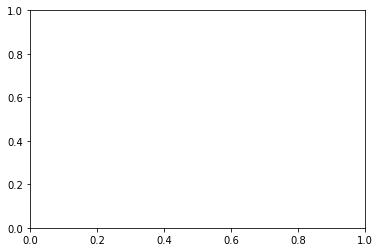

In [25]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [27]:
# 
print(regr.coef_)
print(regr.intercept_)

[ 1.18794997  0.15156301 -0.58685153  0.44321145 -0.11519002 -0.10826212
 -0.01049674 -0.07939384  0.17875774 -0.02351273 -0.13250501  0.29020072
 -0.16738964 -0.01998669  0.0242833  -0.14661462  0.16125972 -0.09965667
 -0.03045908 -0.04123168  0.19606725 -0.00841974 -0.07520677  0.00466013
 -0.04461997  0.13192169 -0.07903851 -0.00428699 -0.02886697 -0.03537875
 -0.01686207 -0.02112922 -0.00582092  0.04012848  0.03798788  0.03422855]
0.018781979755626566


In [59]:
merged_df = methane_emissions_df.loc[methane_emissions_df['Sector']=="Total including LUCF"].merge(GDP_df, how='inner', left_index=True, right_index=True, validate="one_to_one", suffixes=["_gdp","_meth"])
#merged_df.dropna(how='any', axis=0, inplace=True)

In [63]:
merged_df.head()

,Sector,2018_gdp,2017_gdp,2016_gdp,2015_gdp,2014_gdp,2013_gdp,2012_gdp,2011_gdp,2010_gdp,...,2009_meth,2010_meth,2011_meth,2012_meth,2013_meth,2014_meth,2015_meth,2016_meth,2017_meth,2018_meth
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13
India,Total including LUCF,669.34,665.04,659.81,653.61,655.78,656.08,654.89,655.48,653.89,...,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12
United States,Total including LUCF,623.77,615.77,609.89,618.27,621.45,619.02,618.71,628.73,650.38,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.823830e+13,1.874508e+13,1.954298e+13,2.061186e+13
Brazil,Total including LUCF,418.02,427.51,428.63,426.88,418.70,412.93,418.15,414.63,421.50,...,1.666996e+12,2.208838e+12,2.616157e+12,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12
European Union (27),Total including LUCF,396.83,400.83,403.23,408.04,407.58,412.85,419.04,421.67,431.95,...,1.471316e+13,1.454543e+13,1.574179e+13,1.463692e+13,1.529601e+13,1.563424e+13,1.354725e+13,1.388516e+13,1.473476e+13,1.597154e+13


In [64]:
#merged_df.corr().style.bar(color="#d65f5f")

Sector
Agriculture                     [AxesSubplot(0.125,0.125;0.775x0.755)]
Energy                          [AxesSubplot(0.125,0.125;0.775x0.755)]
Fugitive Emissions              [AxesSubplot(0.125,0.125;0.775x0.755)]
Industrial Processes            [AxesSubplot(0.125,0.125;0.775x0.755)]
Land-Use Change and Forestry    [AxesSubplot(0.125,0.125;0.775x0.755)]
Other Fuel Combustion           [AxesSubplot(0.125,0.125;0.775x0.755)]
Total excluding LUCF            [AxesSubplot(0.125,0.125;0.775x0.755)]
Total including LUCF            [AxesSubplot(0.125,0.125;0.775x0.755)]
Waste                           [AxesSubplot(0.125,0.125;0.775x0.755)]
dtype: object

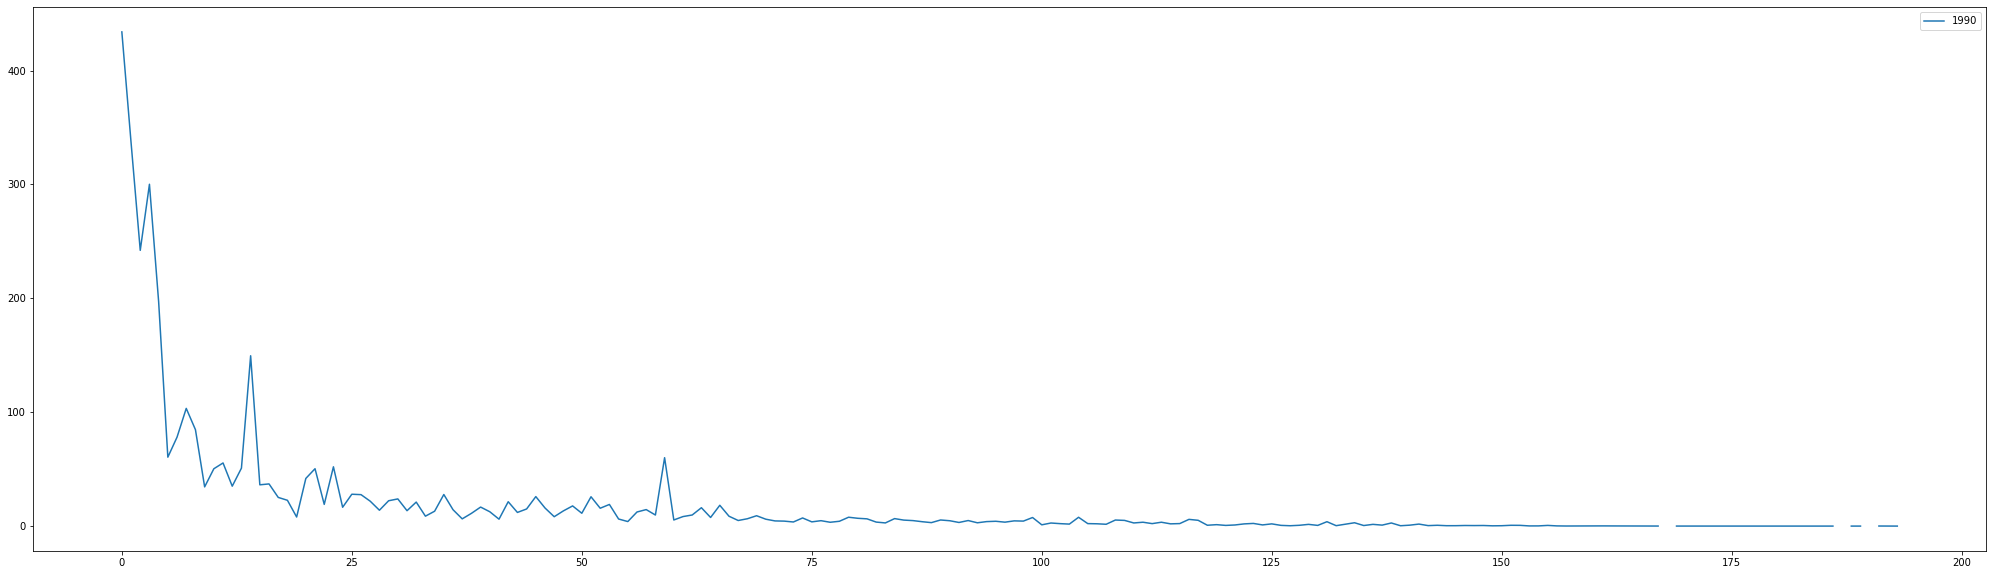

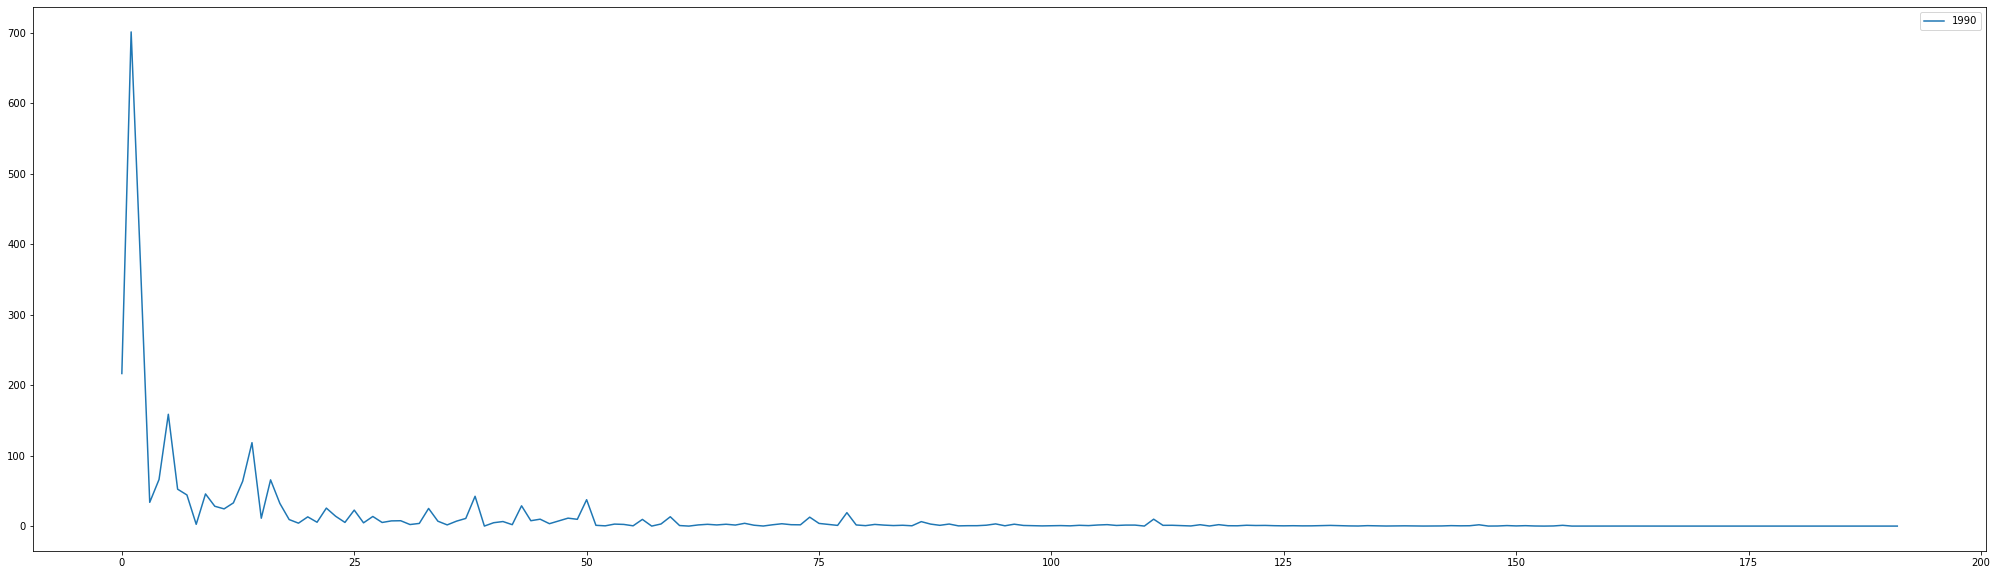

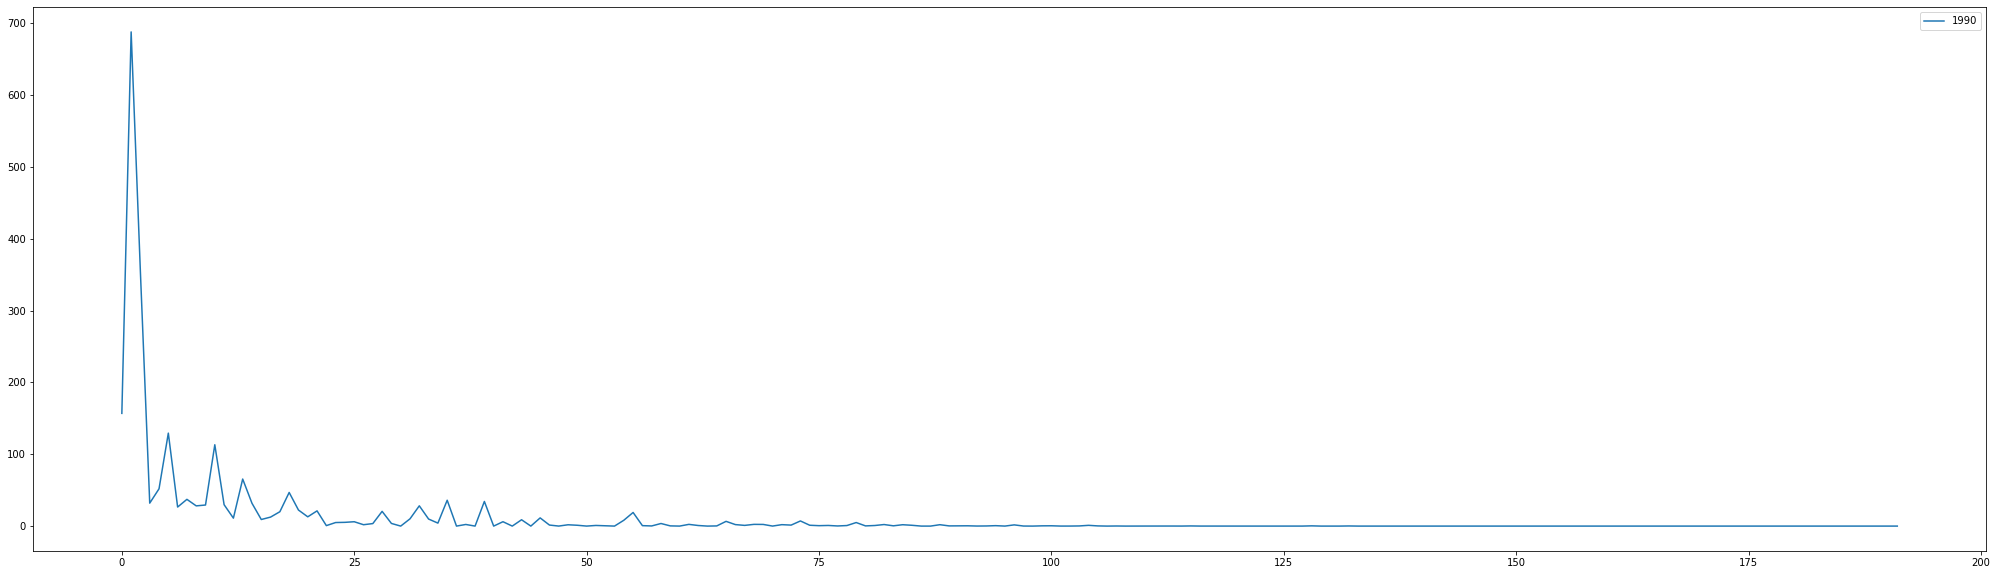

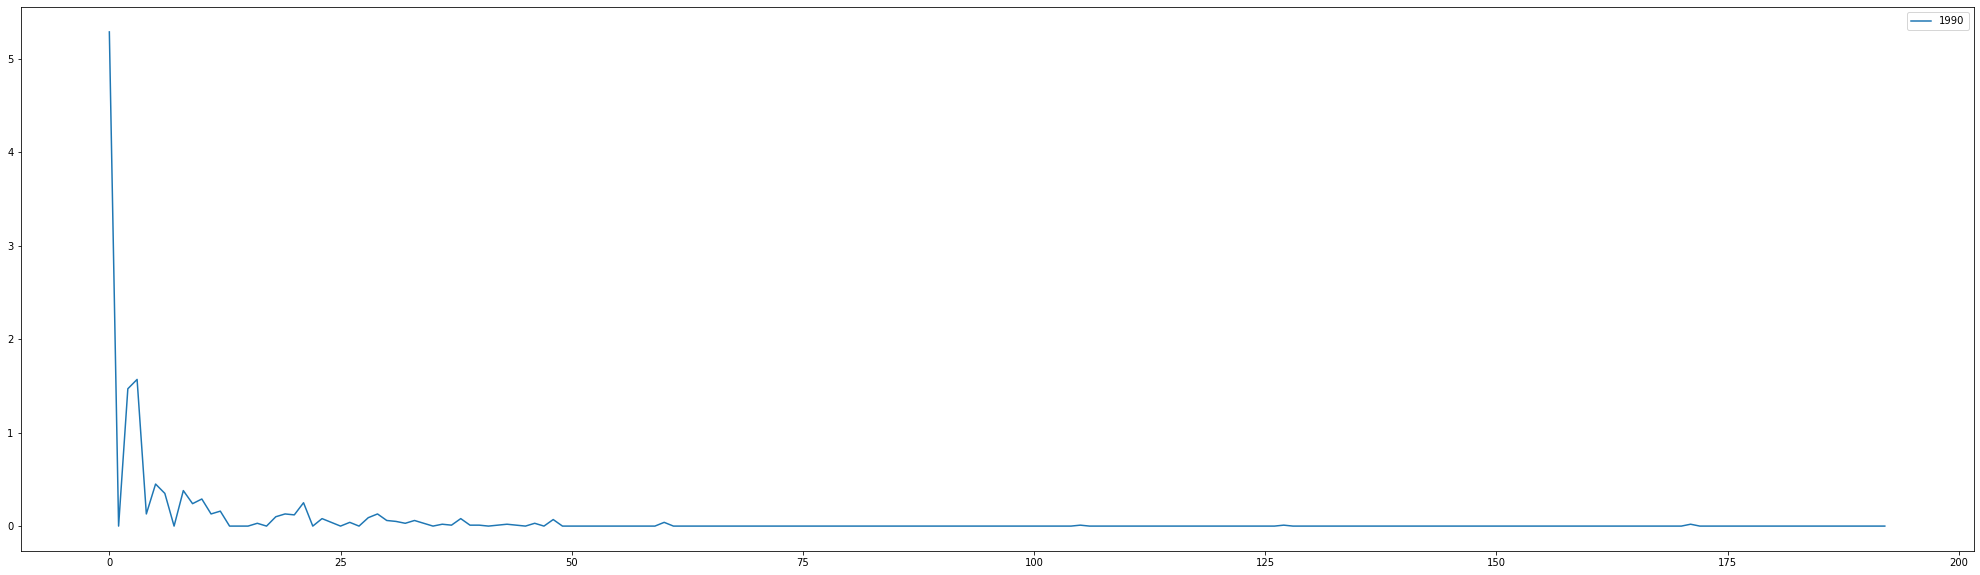

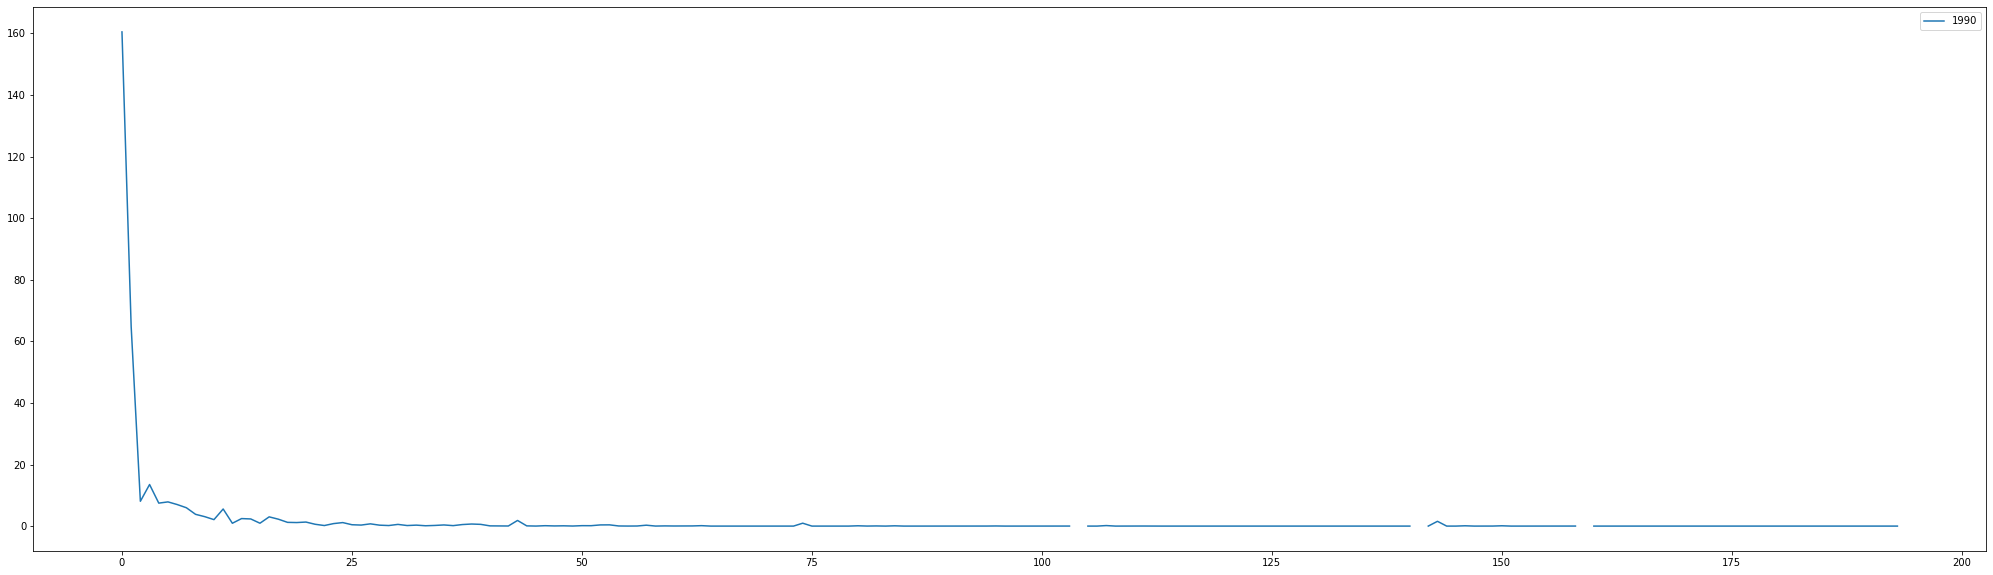

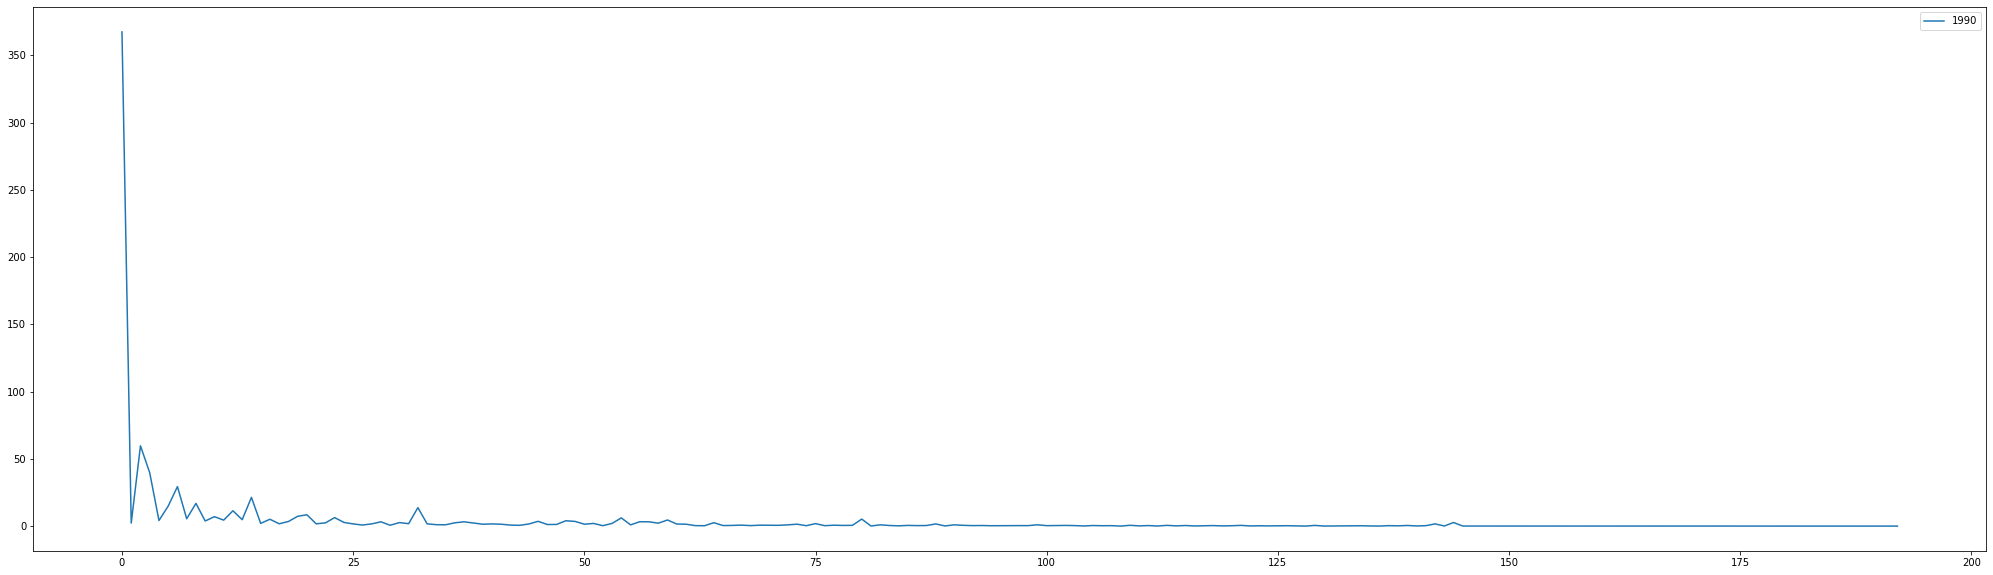

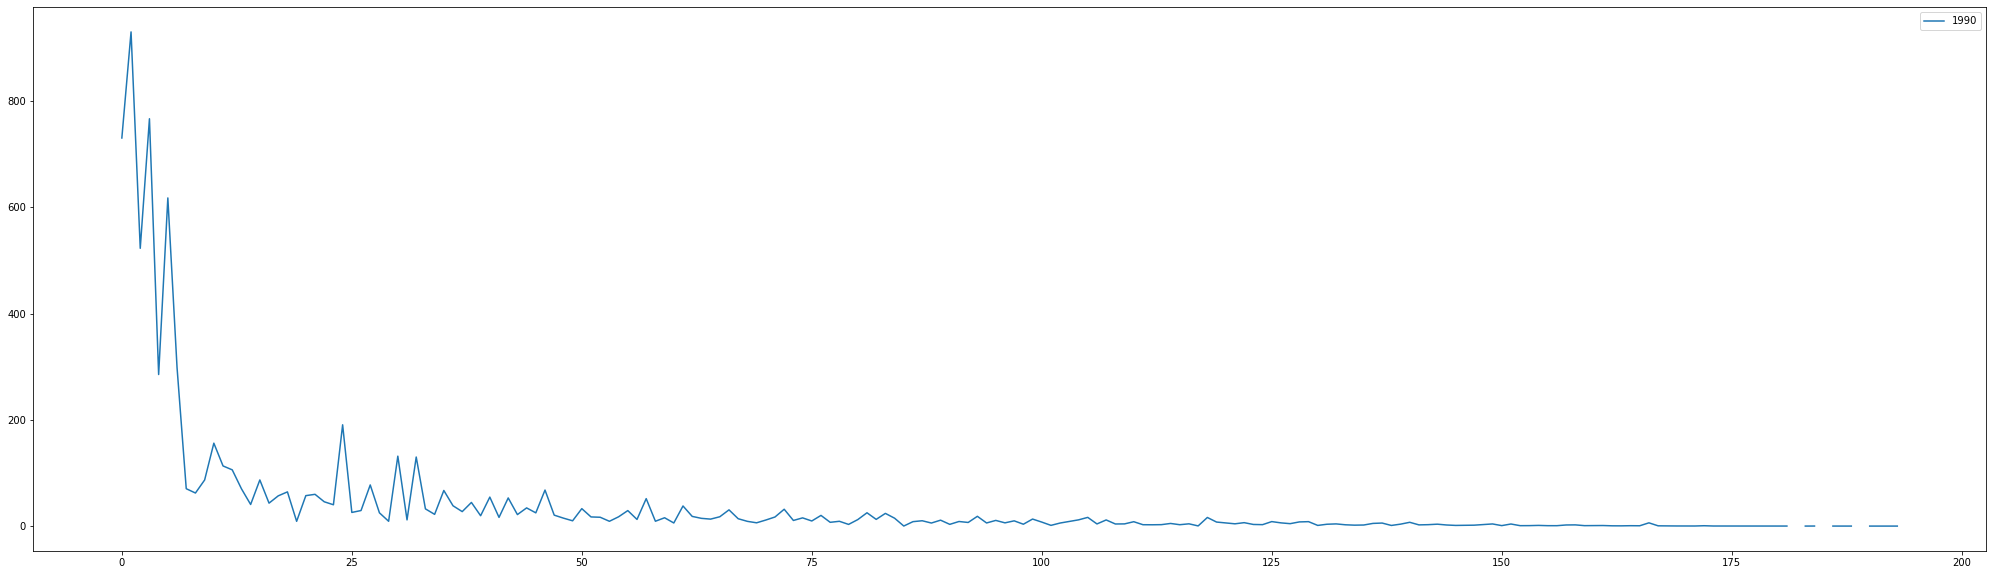

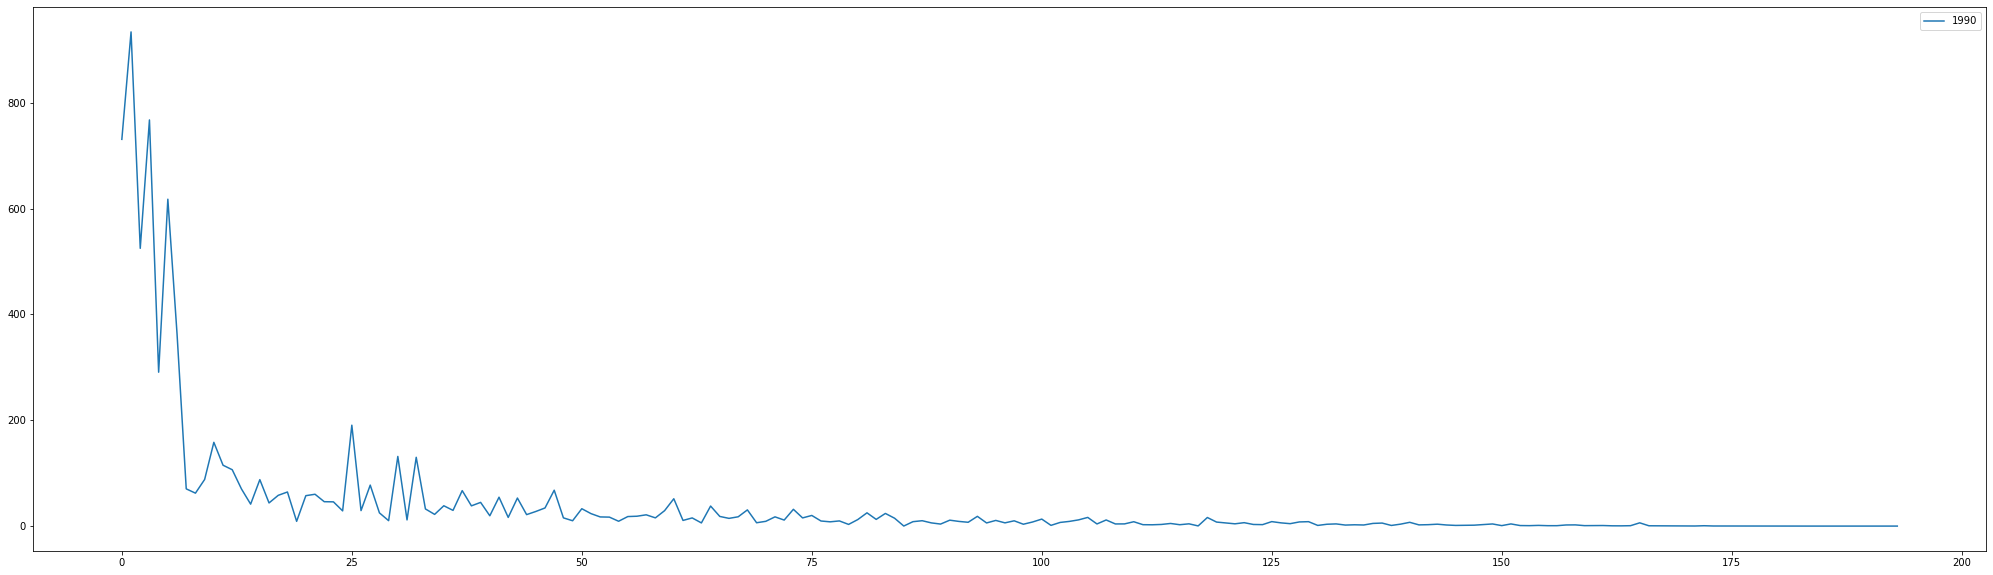

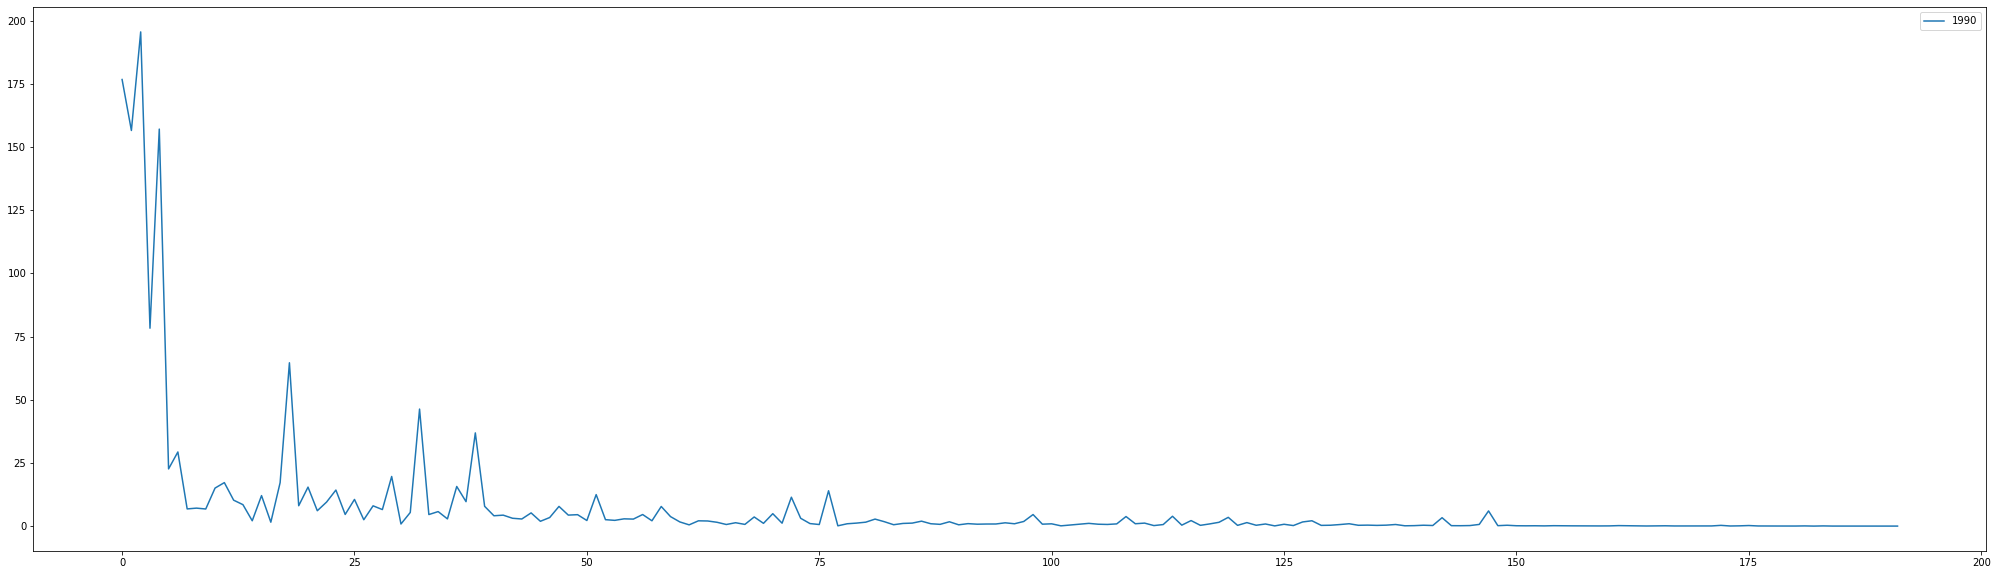

In [109]:
methane_emissions_df.transpose().groupby('Sector').plot(kind='line',y="1990",use_index=False, figsize=(35,10), subplots=True, sharey=True)
#methane_emissions_df.plot(kind='line', figsize=(15,10), sharex=True, sharey=True, loglog=True)